In [1]:
import numpy as np
import matplotlib.pyplot as py
import xarray
import cartopy
import cartopy.util    
import cartopy.feature
import scipy.stats as stats

In [2]:
# Soil Moisture Anlysis
filename = "mrso_Lmon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc"
nc_file = xarray.open_dataset(filename)
# print(nc_file)
 
mrsohistor = nc_file["mrso"].data
timehistorical = nc_file["time"].data
lat = nc_file["lat"].data
lon = nc_file["lon"].data

print("Soil Moisture Content units:", nc_file["mrso"].units)
print("Lat units:", nc_file["lat"].units)
print("Lon units:", nc_file["lon"].units)

filename = "mrso_Lmon_ACCESS-ESM1-5_ssp370_r1i1p1f1_gn_201501-210012.nc"
nc_file = xarray.open_dataset(filename)
# print(nc_file)

mrsossp370 = nc_file["mrso"].data
timefuture = nc_file["time"].data

# append historical and future soil moisture data
mrsodata = np.append(mrsohistor, mrsossp370, axis=0)
mrsodata.shape

# variable to hold time
print ("\nNumber of Months in timeseries: ")

nmonths    = 12
nyears     = (len(timehistorical) + len(timefuture))/nmonths
nyears     = int(nyears)
date       = np.zeros(nyears)
nmon       = (nyears)*12 
print ("years: ", nyears, "months: ", nmon)

# read netcdf file containing area of each grid cell
filename = "areacella_fx_ACCESS-ESM1-5_historical_r1i1p1f1_gn.nc"
nc_file = xarray.open_dataset(filename)

areacella = nc_file['areacella'].data
print(nc_file['areacella'].units)
nc_file.close
print("Area of Earth from areacella: {0:0.3e} m2".format(np.sum(areacella)))

# array with global soil moisture mean estimates
nlat = lat.size
nlon = lon.size
print(nlat, nlon)

mrsoyearmean    = np.zeros((nyears, nlat, nlon))
globalmrso      = np.zeros(nyears)

# average of soil moisture content for individual years
tcounter = 0
for y in range(nyears):
    mrsoyearmean[y,:,:] = np.average(mrsodata[y*12:y*12 + 12, :, :], axis=0)
    globalmrso[y] = np.average(mrsoyearmean[y,:,:], weights=areacella)
    
# Array for time information of annual array
print(nyears)
for i in range(nyears):
    date[i] = 1850.0 + i + 0.5
print("Start year:", date[0], "End year:", date[-1])

# text file
f = open("globalmrso.txt", "w")
f.write("This dataset gives the global soil moisture content from 1850 to 2100\n")
f.write("year   , tas.temp\n")
for i in range(nyears):
    f.write ("{0:6.2f}, {1:f} \n".format(date[i], globalmrso[i]))
f.close()

Soil Moisture Content units: kg m-2
Lat units: degrees_north
Lon units: degrees_east

Number of Months in timeseries: 
years:  251 months:  3012
m2
Area of Earth from areacella: 5.099e+14 m2
145 192
251
Start year: 1850.5 End year: 2100.5


(145, 192) (145, 192)
nan nan
nan nan


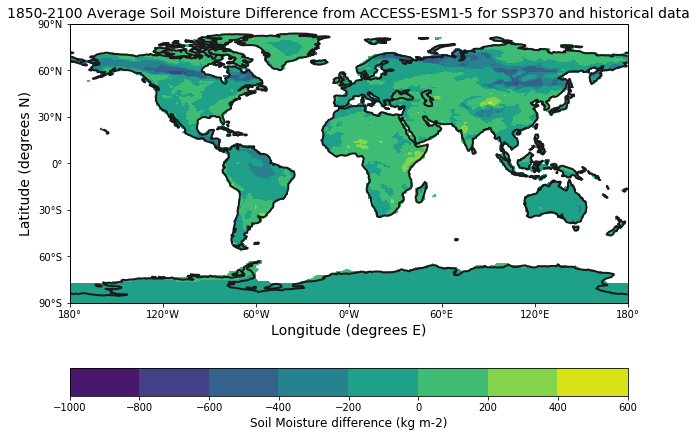

In [3]:

# Global map of soil moisture change using cartopy
mrsobegin = np.average(mrsoyearmean[0:10,:,:], axis=0)
mrsoend = np.average(mrsoyearmean[-10:-1,:,:], axis=0)
print(mrsobegin.shape, mrsoend.shape)
print(mrsobegin.min(), mrsobegin.max())
print(mrsoend.min(), mrsoend.max())
mrsodiff = mrsoend - mrsobegin

# map
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig1 = py.figure(2, figsize = (10,8))
my_font_size = 12
ax1 = fig1.add_subplot(111,projection=cartopy.crs.PlateCarree())
cyclic_mrsodiff, cyclic_lon = cartopy.util.add_cyclic_point(mrsodiff, coord=lon, axis=1)
contour_plot = ax1.contourf(cyclic_lon, lat, cyclic_mrsodiff)

ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=cartopy.crs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=cartopy.crs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

ax1.set_ylabel("Latitude (degrees N)", fontsize = my_font_size + 2)
ax1.set_xlabel("Longitude (degrees E)", fontsize = my_font_size + 2)
ax1.set_title("1850-2100 Average Soil Moisture Difference from ACCESS-ESM1-5 for SSP370 and historical data", fontsize = my_font_size+ 2)
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('Soil Moisture difference (kg m-2)', fontsize = my_font_size)
ax1.coastlines(color='0.1', lw=2.0)

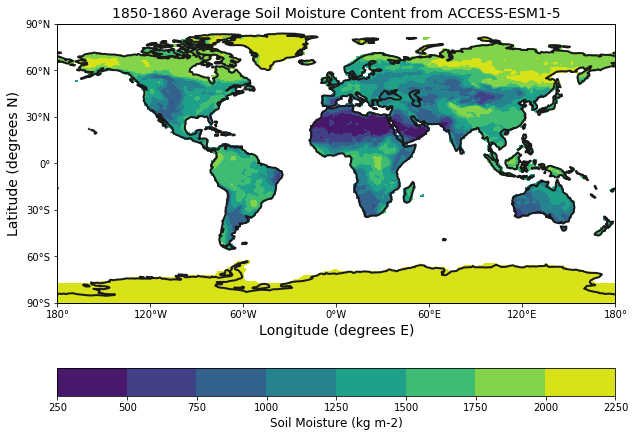

In [4]:
# plot for first 10 years of soil moisture content
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig1 = py.figure(2, figsize = (10,8))
my_font_size = 12
ax1 = fig1.add_subplot(111,projection=cartopy.crs.PlateCarree())
cyclic_mrsobegin, cyclic_lon = cartopy.util.add_cyclic_point(mrsobegin, coord=lon, axis=1)
contour_plot = ax1.contourf(cyclic_lon, lat, cyclic_mrsobegin)

ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=cartopy.crs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=cartopy.crs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

ax1.set_ylabel("Latitude (degrees N)", fontsize = my_font_size + 2)
ax1.set_xlabel("Longitude (degrees E)", fontsize = my_font_size + 2)
ax1.set_title("1850-1860 Average Soil Moisture Content from ACCESS-ESM1-5", fontsize = my_font_size+ 2)
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('Soil Moisture (kg m-2)', fontsize = my_font_size)
ax1.coastlines(color='0.1', lw=2.0)

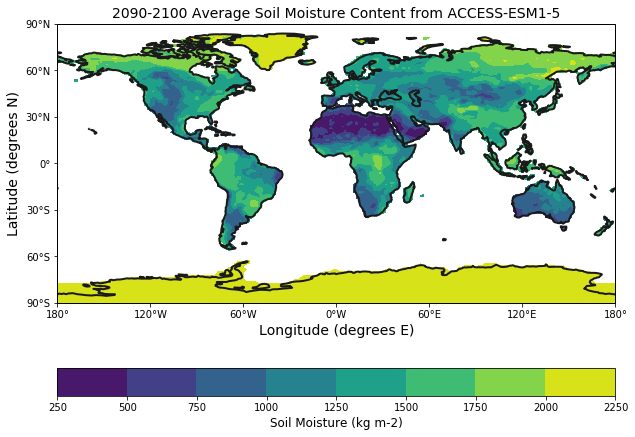

In [5]:
# plot for last 10 years of soil moisture content
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig1 = py.figure(2, figsize = (10,8))
my_font_size = 12
ax1 = fig1.add_subplot(111,projection=cartopy.crs.PlateCarree())
cyclic_mrsoend, cyclic_lon = cartopy.util.add_cyclic_point(mrsoend, coord=lon, axis=1)
contour_plot = ax1.contourf(cyclic_lon, lat, cyclic_mrsoend)

ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=cartopy.crs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=cartopy.crs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

ax1.set_ylabel("Latitude (degrees N)", fontsize = my_font_size + 2)
ax1.set_xlabel("Longitude (degrees E)", fontsize = my_font_size + 2)
ax1.set_title("2090-2100 Average Soil Moisture Content from ACCESS-ESM1-5", fontsize = my_font_size+ 2)
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('Soil Moisture (kg m-2)', fontsize = my_font_size)
ax1.coastlines(color='0.1', lw=2.0)

Text(0.5, 1.0, 'CMIP6 global mean Soil Moisture prediction from ACCESS-ESM1-5')

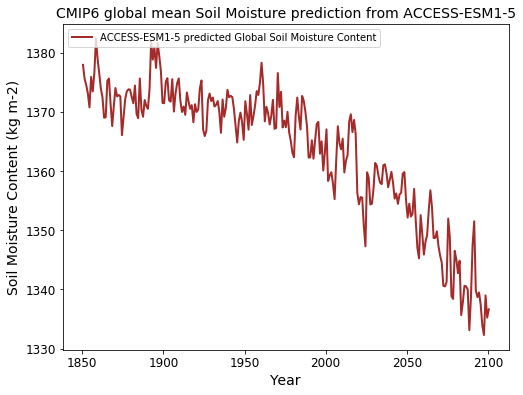

In [6]:
# Gloabl time series soil moisture change
meanmrsoyear = np.zeros(nyears)
for i in range(nyears):
    mrsoyr = mrsoyearmean[i,:,:]
    indices = ~np.isnan(mrsoyr)
    meanmrsoyear[i] = np.average(mrsoyr[indices], weights=areacella[indices])
    
py.close(1)
fig1 = py.figure(1,figsize=(8,6)) 
my_font_size = 12
ax1 = fig1.add_subplot(1,1,1) 
ax1.plot(date,  meanmrsoyear, color="brown", label="ACCESS-ESM1-5 predicted Global Soil Moisture Content", linewidth=2)
ax1.set_ylabel("Soil Moisture Content (kg m-2)", fontsize = my_font_size + 2)
ax1.set_xlabel("Year", fontsize = my_font_size+ 2)
ax1.tick_params(labelsize = my_font_size)
ax1.legend(loc = "upper left")
ax1.set_title("CMIP6 global mean Soil Moisture prediction from ACCESS-ESM1-5", fontsize = my_font_size + 2)

In [7]:
totalmonths = len(mrsodata[:,0,0])
tdata       = np.zeros(totalmonths)
for i in range(totalmonths):
    tdata[i] = 1850.0 + (1.0/12.0)*i + 1.0/24.0

print ("The last month in the time series is:", tdata[0])
print ("The last month in the time series is:", tdata[-1])

The last month in the time series is: 1850.0416666666667
The last month in the time series is: 2100.958333333333


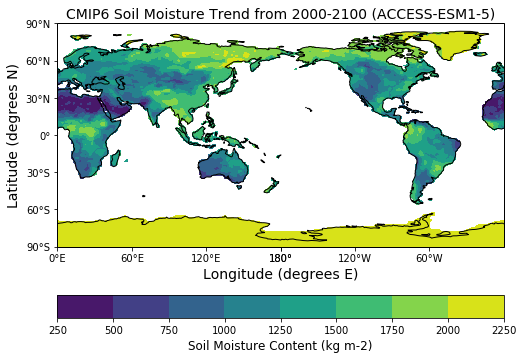

In [9]:
mrsolasthundred = mrsodata[-100,:,:]

fig = py.figure(figsize = (8,6))
my_font_size = 12
ax1 = fig.add_subplot(111, projection=cartopy.crs.PlateCarree(central_longitude = 180))
ax1.add_feature(cartopy.feature.COASTLINE, zorder=100, edgecolor='k')
cyclic_mrsodiff, cyclic_lon = cartopy.util.add_cyclic_point(mrsolasthundred, coord=lon, axis=1)
contour_plot = ax1.contourf(cyclic_lon, lat, cyclic_mrsodiff,transform=cartopy.crs.PlateCarree(central_longitude = 0))

ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=cartopy.crs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=cartopy.crs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

ax1.set_ylabel("Latitude (degrees N)", fontsize = my_font_size + 2)
ax1.set_xlabel("Longitude (degrees E)", fontsize = my_font_size + 2)

cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('Soil Moisture Content (kg m-2)', fontsize = my_font_size)
ax1.set_title("CMIP6 Soil Moisture Trend from 2000-2100 (ACCESS-ESM1-5)", fontsize = my_font_size + 2)
py.show()
